In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
import matplotlib.ticker as ticker


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

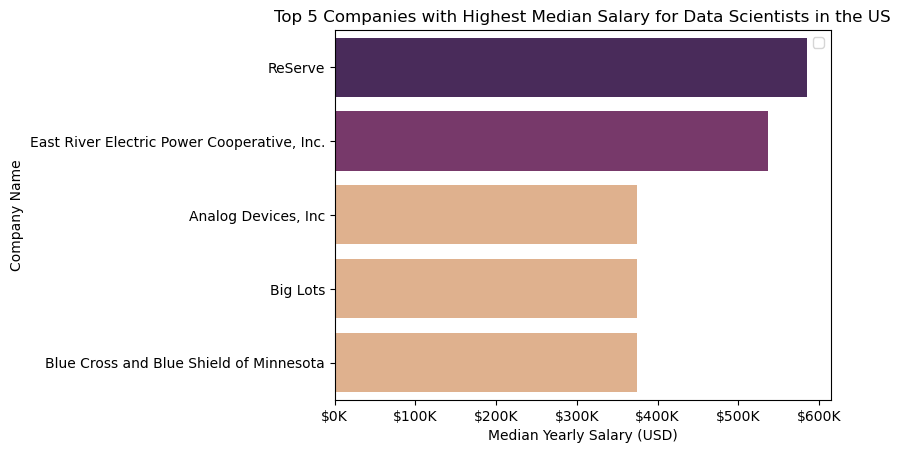

In [51]:
tcs = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset= 'salary_year_avg').copy()
med_dss = tcs.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=med_dss, x='salary_year_avg', y='company_name',hue='salary_year_avg', palette= 'flare')
plt.legend('')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

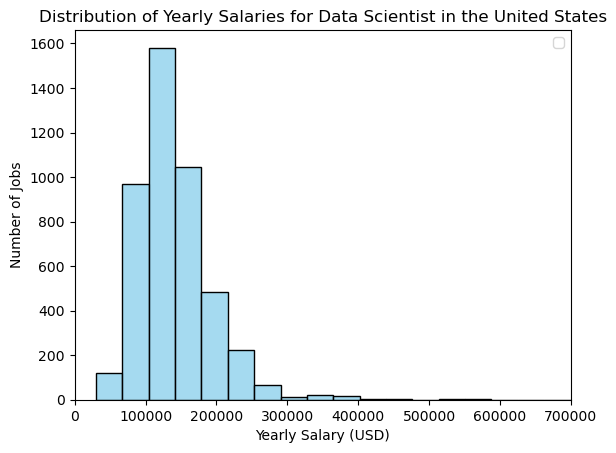

In [49]:
tcs2 = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset= ['salary_year_avg']).copy()

sns.histplot(data=tcs2['salary_year_avg'], bins=25, kde=False)
plt.legend('')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 700000)
plt.ylabel('Number of Jobs')
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.show()

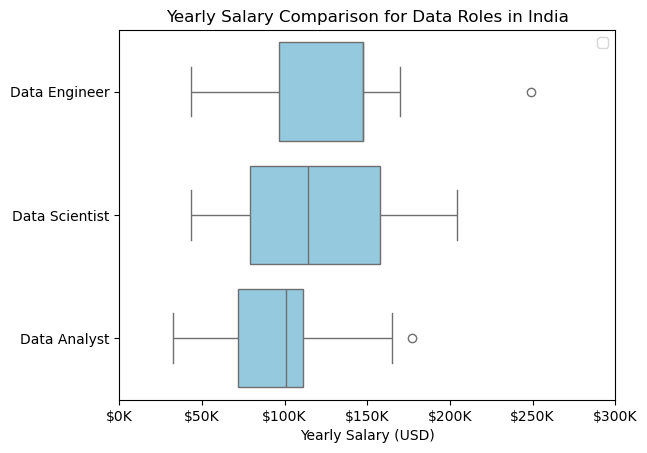

In [64]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

filtered = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='India')].dropna(subset=['salary_year_avg']).copy()


sns.boxplot(data=filtered, y='job_title_short', x='salary_year_avg', color='skyblue')
plt.legend('')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.ylabel('')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.show()

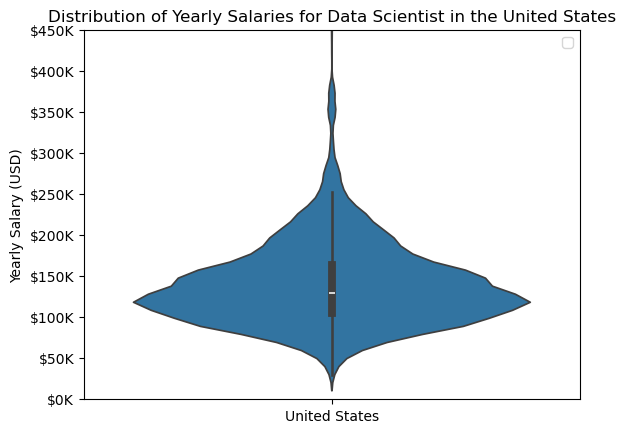

In [69]:
tcs2 = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].dropna(subset= ['salary_year_avg']).copy()

sns.violinplot(data=tcs2, x='job_country', y='salary_year_avg')
plt.legend('')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.show()